# Name Evaluation

This document evaluates a list of American names published by the Social Security Administration.

[SSA data taken from here](https://rstudio-pubs-static.s3.amazonaws.com/24678_8234c801b4134f2cb32d8077f6cd75a2.html). Phonetic dictionary from CMU Sphinx project. [Scrabble dictionary from here](https://github.com/adrielklein/scrabble-word-finder). [Biblical names from here](https://github.com/SuzanaK/biblical_dictionary).

In [2]:
# Names taken out of consideration

family_names = {
    'Robert', 'Bob', 'Paula', 'Teo', 'Hannah', 'Andrew',
    'Andy', 'Rylan', 'Jacob', 'Martha', 'Neil', 'Carol', 'Sandy',
    'Leslie', 'Joel', 'Noah', 'Isaac', 'Benjamin', 'Ben',    
}

friend_names = {
    'Kevin', 'Sabrina', 'Pete', 'Peter', 'Sarahana', 'Andy', 'Cap', 'Kim',
    'Malika', 'Canaan', 'Max', 'Ellis', 'Brandon', 'Oliver', 'Polly', 'Bilal',
}

colleague_names = {
    'Anna', 'Jaime', 'Ian', 'Sufian', 'Vedant', 'Olivier', 'Raz', 'Jenna',
    'Whitney', 'Rachel', 'Jon', 'John', 'Racine', 'Rocio', 'Jason', 'Simon',
    'Fiona', 'Renaud', 'Aaron', 'Sam', 'Samantha', 'Michael', 'Allan', 'Cal',
    'Stewart', 'Ahmed', 'Arpita', 'Jonathan', 'Milo', 'Cy', 'Hera', 'Renaud',
    'Christopher', 'Daniel', 'Stan', 'Gio', 'Anders', 'Avi', 'Lara', 'Moishe',
    'Gregg', 'Stefan'
}

famous_people = {
    'Adolf', 'Adolph', 'Donald',
    'Barack', 'Bill',
    'Michaelangelo', 'Leonardo', 'Splinter', 'Shredder', 'Krang',
    'Lucille', 'Jesus', 'Jean Luc', 'William', 'Harry', 'Geordi',
    'Ayn', 'Tupac', 'Oprah', 'Vader', 'Kermit',
}

block_list = {
    'Uber', 'Nacho', 'Avis', 'Ryker', 'Jude', 'Judah', 'Jihad', 'Gaza',
    'Jesus', 'Moses', 'Mohammad', 'Ray', 'Pansy', 'Ulysses'
}.union(
    family_names, friend_names, colleague_names, famous_people
)

cool_names = {
    'Mia',
    'Leidy',
    'Chess',
    'Key',
    'Less',
    'Vella',
    'Ekco',
    'Echo',
    'Twig'
    'Del',
    'Eloy',
    'Helix',
    'Ada',
    'Luma',
    'Lua',
    'Elia',
    'Arthur',
    'Tron',
    'Alice',
    'Rita',
    'June',
    'Lina',
    'Amelia',
    'Regan',
    'Kermit',
    'Melchizedek',
    'Shingo',
    'Gray',
    'Moss',
}

In [3]:
# Read the list of all names since 1880 from the SSA dataset
from os import listdir
from os.path import isfile, join
yob_file_list = [f for f in listdir("ssa") if isfile(join("ssa", f)) and f.startswith("yob")]

import csv
year_name_frequency = {}
gender_year_name_frequency = {}
gender_year_name_frequency['M'] = {}
gender_year_name_frequency['F'] = {}
for file_name in yob_file_list:
    year = int(file_name[3:7])
    year_name_frequency[year] = {}
    gender_year_name_frequency['M'][year] = {}
    gender_year_name_frequency['F'][year] = {}
    with open(join("ssa", file_name)) as content:
        csvReader = csv.reader(content)
        for row in csvReader:
            year_name_frequency[year][row[0]] = year_name_frequency[year].get(row[0], 0) + int(row[2])
            gender_year_name_frequency[row[1]][year][row[0]] = int(row[2])

In [4]:
# Read the dictionary
phonetic_dictionary = {}
with open("cmudict/cmudict.dict") as file:
    for line in file:
       list = line.split('#')[0].split()
       phonetic_dictionary[str(list[0])] = list[1::]

In [5]:
# Read a dictionary of english words
# Words from https://github.com/adrielklein/scrabble-word-finder
english_dictionary = set()
with open("twl06.txt") as file:
    for line in file:
       english_dictionary.add(line.strip())

In [6]:
# Read a dictionary of biblical names
# Words from https://github.com/SuzanaK/biblical_dictionary
biblical_names = set()
with open("biblical_names_in_wordnet.txt") as file:
    for line in file:
       biblical_names.add(line.strip())

In [7]:
# Get an all-time frequency map 
name_frequency = {};
for year in year_name_frequency.keys():
    for name in year_name_frequency[year].keys():
        name_frequency[name] = name_frequency.get(name, 0) + year_name_frequency[year][name]
sorted_name_frequency = sorted(name_frequency.items(), key=lambda kv: kv[1])[::-1]

# Get frequency for each name by gender
gender_name_frequency = { 'M': {}, 'F': {} }
for gender in gender_year_name_frequency.keys():
    for year in gender_year_name_frequency[gender].keys():
        for name in gender_year_name_frequency[gender][year].keys():
            gender_name_frequency[gender][name] = gender_name_frequency[gender].get(name, 0) + gender_year_name_frequency[gender][year][name]

# Get a frequency rank overall
name_rank = {};
i = 0
for pair in sorted_name_frequency:
    name_rank[pair[0]] = i
    i = i + 1

# Create a map from name to a graph of frequency by year
name_year_frequency = {};
for year in year_name_frequency:
    for name in year_name_frequency[year]:
        if name not in name_year_frequency:
            name_year_frequency[name] = {}
        name_year_frequency[name][year] = year_name_frequency[year][name]

# In what year was the name most popular
name_peak_year = {};
for name in name_year_frequency:
    name_peak_year[name] = sorted(name_year_frequency[name].items(), key=lambda kv: kv[1])[::-1][0][0]

In [8]:
import matplotlib.pyplot as plt
for name in cool_names:
    if name in name_year_frequency:
        x, y = zip(*sorted(name_year_frequency[name].items()))
        plt.plot(x, y, label=name)
        plt.legend();
plt.show();

<Figure size 640x480 with 1 Axes>

In [9]:
# Normalize a name by it's pronunciation
def normalize_pronunciation(name):
    if name.lower() in phonetic_dictionary:
        return "-".join(phonetic_dictionary[name.lower()])
    return "-"

# Map names to their phonetic length
name_length = {}
for name in name_frequency:
    if name.lower() in phonetic_dictionary:
        name_length[name] = len(phonetic_dictionary[name.lower()])
# sorted_name_length = sorted(name_length.items(), key=lambda kv: kv[1])[::-1]
# sorted_name_length[:5]

# Map a normalized name to its homonyms
name_homonyms = {}
for name in name_frequency:
    normal = normalize_pronunciation(name)
    if normal not in name_homonyms:
        name_homonyms[normal] = [];
    name_homonyms[normal].append(name)

# Return True if there are no homonyms or if the given name is the
# most popular among all known homonyms. This is useful for
# filtering out unnecessary homonyms.
def isMostFrequentHomonym(name):
    if name_features[name]['homonym_count'] < 2:
        return True
    return (name == sorted(
        name_features[name]['homonyms'],
        key=lambda name: name_features[name]['popularity_rank']
    )[0])

# Names with most homonyms
# sorted_name_homonym_count = sorted(name_homonyms.items(), key=lambda kv: len(kv[1]))[::-1]
# sorted_name_homonym_count[1::][:5]

In [10]:
name_features = {};
for name in name_frequency:
    
    homonyms = name_homonyms.get(normalize_pronunciation(name), []) if normalize_pronunciation(name) != '-' else []
    min_homonym_female_ratio = min(
        [1.0] + [item for item in map(lambda n: 1.0 * gender_name_frequency['F'].get(n, 0)/(gender_name_frequency['F'].get(n, 0) + gender_name_frequency['M'].get(n, 0)),
            name_homonyms.get(normalize_pronunciation(name), []) \
                if normalize_pronunciation(name) != '-' else []
        )]
    )
    max_homonym_female_ratio = max(
        [0.0] + [item for item in map(lambda n: 1.0 * gender_name_frequency['F'].get(n, 0)/(gender_name_frequency['F'].get(n, 0) + gender_name_frequency['M'].get(n, 0)),
            name_homonyms.get(normalize_pronunciation(name), []) \
                if normalize_pronunciation(name) != '-' else []
        )]
    )
    
    name_features[name] = {
        'peak_year': name_peak_year.get(name, 0),
        'phonetic': phonetic_dictionary.get(name.lower(), ''),
        'phoneme_count': len(phonetic_dictionary.get(name.lower(), '')),
        'homonyms': homonyms,
        'homonym_count': len(homonyms),
        'popularity_rank': name_rank.get(name, -1),
        'female_ratio': 1.0 * gender_name_frequency['F'].get(name, 0) / (gender_name_frequency['F'].get(name, 0) + gender_name_frequency['M'].get(name, 0)),
        'min_homonym_female_ratio': min_homonym_female_ratio,
        'max_homonym_female_ratio': max_homonym_female_ratio,
        'is_in_dictionary': name.lower() in english_dictionary,
        'is_block_listed': name in block_list,
        'is_reverse_in_dictionary': name.lower()[::-1] in english_dictionary,
        'is_biblical_name': name in biblical_names,
    }

In [11]:
# Warning: if we insist on having a phonetic spelling we'll miss out on names
#          that aren't in the phonetic dictionary.

criteria = lambda name, n: \
    not n['is_block_listed'] and \
    n['popularity_rank'] >= 0 and \
    n['popularity_rank'] <= 100000 and \
    n['peak_year'] >= 0 and n['peak_year'] <= 2009 and \
    n['homonym_count'] >= 0 and \
    n['female_ratio'] == 0.0 and \
    n['min_homonym_female_ratio'] >= 0.0 and n['max_homonym_female_ratio'] <= 0.0 and \
    n['phoneme_count'] > 0 and n['phoneme_count'] < 100 and \
    not n['is_biblical_name']
#    n['phonetic'][-1] in {'V', 'Z'}
#    n['phonetic'][-2:] == ['D', 'OW0']
#    not n['is_in_english_dictionary'] and \
#    n['phonetic'][0] in {'D', 'M', 'N'} and \

list = [item for item in name_features.items() if criteria(item[0], item[1])]

print("Matches: " + str(len(list)))

import random
[item[0] for item in random.sample(list, min(10, len(list)))]

Matches: 3883


['Haynes',
 'Correll',
 'Sy',
 'Furman',
 'Gonzalo',
 'Bain',
 'Hedley',
 'Friend',
 'Thurlow',
 'Leonid']

In [12]:
max_peak_year = max(map(lambda p: p[1]['peak_year'], name_features.items()))
min_peak_year = min(map(lambda p: p[1]['peak_year'], name_features.items()))
max_popularity_rank = max(map(lambda p: p[1]['popularity_rank'], name_features.items()))
max_phoneme_count = max(map(lambda p: p[1]['phoneme_count'], name_features.items()))
max_homonym_count = max(map(lambda p: p[1]['homonym_count'], name_features.items()))

weights = {
    # Names that were most popular in 2018 get 1.0 and names that
    # peaked in popularity in 1880 get a score of 0.0.
    'peak_year_recency_ratio': 0.001,
    
    # 1.0 if the name peaked before 2010 or 0.0 if after.
    'is_peak_year_before_2010': 0.00,

    # 1.0 if the name peaked before 2005 or 0.0 if after.
    'is_peak_year_before_2005': 0.00,

    # 1.0 if the name peaked before 2000 or 0.0 if after.
    'is_peak_year_before_2000': 0.0,

    # 1.0 if the name peaked before 1982 or 0.0 if after.
    'is_peak_year_before_1982': 0.00,

    # 1.0 if the name peaked after 1948 or 0.0 if after.
    'is_peak_year_after_1948': 0.01,

    # The most popular name gets a score of 1.0 and the least 1.0.
    'popularity_rank_ratio': 0.01,

    # Names that aren't in the top n get a score of 1.0. Else 0.
    'is_not_too_popular': 0.0,
    
    # Names that are in the top n get a score of 1.0. Else 0.
    'is_popular_enough': 0.00,
    
    # Names that are only ever female get 1.0. Names that are only
    # male get 0.0
    'female_ratio': 0.0,
    
    # Names get 1.0 if they are less than 25% female, else 0.
    'female_ratio_cutoff_20': 0.01,
    
    # The maximum `female_ratio` score across all homonyms
    'max_homonym_female_ratio': 0.0,
    
    # The minimum `female_ratio` score across all homonyms
    'min_homonym_female_ratio': 0.0,
    
    # 1.0 if the name is block listed, else 0.0.
    'is_block_listed': -1.0,
    
    # 1.0 if the name is in the English dictionary, else 0.0
    'is_in_dictionary': 0.0,
    
    # 1.0 if the reverse of the name is in the English dictionary
    'is_reverse_in_dictionary': 0.0,
    
    # 1.0 if the name is in the phonetic dictionary
    'is_in_phonetic_dictionary': 0.0,
    
    # 1.0 if the name has the most phonemes
    'phoneme_count_ratio': 0.0,
    
    # 1.0 if the name has the most homonyms
    'homonym_count_ratio': 0.0,
    
    # 1.0 if the name is in a dictionary of biblical names, else 0
    'is_biblical_name': -0.2,
    
    'is_most_frequent_homonym': 1.0,
}

name_vector = {name: {
    'peak_year_recency_ratio': 1.0 - (1.0 * (max_peak_year - v['peak_year']) / min_peak_year),
    'is_peak_year_before_2010': 1.0 if v['peak_year'] < 2010 else 0.0,
    'is_peak_year_before_2005': 1.0 if v['peak_year'] < 2005 else 0.0,    
    'is_peak_year_before_2000': 1.0 if v['peak_year'] < 2000 else 0.0,    
    'is_peak_year_before_1982': 1.0 if v['peak_year'] < 1982 else 0.0,
    'is_peak_year_after_1948': 1.0 if v['peak_year'] > 1948 else 0.0,
    'popularity_rank_ratio': 1.0 - (1.0 * v['popularity_rank'] / max_popularity_rank),
    'is_not_too_popular': 1.0 if v['popularity_rank'] >= 400 else 0,
    'is_popular_enough': 1.0 if v['popularity_rank'] < 600 else 0,
    'female_ratio': v['female_ratio'],
    'female_ratio_cutoff_20': 1.0 if v['female_ratio'] <= 0.20 else 0.0,
    'max_homonym_female_ratio': v['max_homonym_female_ratio'],
    'min_homonym_female_ratio': v['min_homonym_female_ratio'],
    'is_block_listed': 1.0 if v['is_block_listed'] else 0.0,
    'is_in_dictionary': 1.0 if v['is_in_dictionary'] else 0.0,
    'is_reverse_in_dictionary': 1.0 if v['is_reverse_in_dictionary'] else 0.0,
    'is_in_phonetic_dictionary': 1.0 if not v['phoneme_count'] else 0.0,
    'phoneme_count_ratio': (1.0 * v['phoneme_count'] / max_phoneme_count),
    'homonym_count_ratio': (1.0 * v['homonym_count'] / max_homonym_count),
    'is_biblical_name': 1.0 if v['is_biblical_name'] else 0.0,
    'is_most_frequent_homonym': 1.0 if isMostFrequentHomonym(name) else 0.0,
} for name, v in name_features.items()}

from functools import reduce
def score(name):
    return reduce(
        lambda s, feature: \
            s + (weights[feature] * name_vector[name][feature]),
        weights.keys(),
        0.0
    )

from random import sample
names = sorted(sample(name_vector.items(), len(name_vector.items())), key=lambda kv: score(kv[0]))[::-1]

# Filter out the least popular homonyms.
for name in [name[0] for name in filter(lambda kv: isMostFrequentHomonym(kv[0]), names)][:1000]:
    print(name)

Kenneth
Mark
Gary
Steven
Dennis
Anthony
Carl
Timothy
Jeffrey
Douglas
Lawrence
Roger
Gregory
Bruce
Stanley
Dale
Patrick
Russell
Brian
Scott
Glenn
Alan
Keith
Frederick
Randy
Martin
Danny
Steve
Mike
Vincent
Phillip
Curtis
Victor
Craig
Jim
Gordon
Barry
Ricky
Tony
Tom
Eric
Rodney
Randall
Jerome
Dean
Jay
Jose
Darrell
Dan
Jeffery
Duane
Nicholas
Manuel
Chris
Wesley
Jeff
Guy
Juan
Ted
Bradley
Tim
Rick
Todd
Perry
Dwight
Dave
Mitchell
Alex
Nathaniel
Reginald
Clifton
Clayton
Carlos
Clinton
Nathan
Troy
Donnie
Antonio
Stuart
Nelson
Greg
Kent
Gerard
Rickey
Rex
Byron
Ruben
Ross
Garry
Randolph
Kurt
Nick
Loren
Mario
Carlton
Kirk
Brent
Sherman
Wade
Ramon
Luis
Terrence
Brad
Marcus
Clark
Francisco
Tyrone
Rudy
Grant
Preston
Ed
Pedro
Raul
Roberto
Teddy
Lance
Ricardo
Kenny
Ron
Ken
Adrian
Noel
Alonzo
Travis
Hector
Van
Alfonso
Marty
Lionel
Lorenzo
Andre
Miguel
Kyle
Phil
Roderick
Armando
Brett
Darwin
Doug
Spencer
Hal
Bradford
Alfredo
Miles
Monte
Clay
Joey
Fernando
Sterling
Salvador
Al
Vance
Lamar
Ward
Rafael
Artu

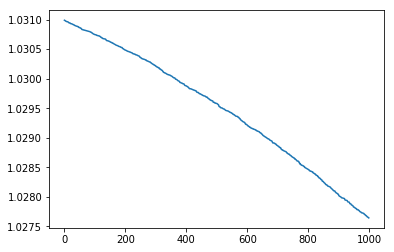

In [13]:
import matplotlib.pyplot as plt
plt.plot(
    [t[0] for t in enumerate(names)][:1000],
    [score(t[1][0]) for t in enumerate(names)][:1000],
    label=score
)
plt.show();

In [14]:
name_features['Moss']

{'peak_year': 1922,
 'phonetic': ['M', 'AO1', 'S'],
 'phoneme_count': 3,
 'homonyms': ['Moss'],
 'homonym_count': 1,
 'popularity_rank': 8200,
 'female_ratio': 0.0,
 'min_homonym_female_ratio': 0.0,
 'max_homonym_female_ratio': 0.0,
 'is_in_dictionary': True,
 'is_block_listed': False,
 'is_reverse_in_dictionary': False,
 'is_biblical_name': False}

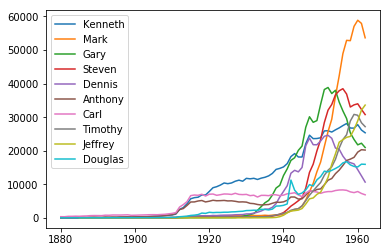

In [15]:
import matplotlib.pyplot as plt
for name in [name[0] for name in names[:10]]:
    if name in name_year_frequency:
        x, y = zip(*sorted(name_year_frequency[name].items()))
        plt.plot(x, y, label=name)
        plt.legend();
plt.show();

In [16]:
# Read training data
ratings = {}
with open("./name_ratings.tsv") as file:
    for line in file:
        columns = line.split("\t")
        ratings[columns[0]] = {
            'Hannah': columns[1],
            'Andrew': columns[2]
        }

FileNotFoundError: [Errno 2] No such file or directory: './name_ratings.tsv'